# Generate a dataset for sPlot

The dataset will contain signal events with a sinusiodal azimuthal dependence

f(#phi) = 1 + 0.4 h P cos(2#phi) - 0.6 h P sin(2#phi)   --(1)
where P is an event polarisation and h a polarisation state which will be incorporated into the fit PDF.

The signal missing mass distribution Mmiss will be Gaussian with mean 5 and #sigma 0.7. It will have a range 0-10.

Background will be generated with a 1:1 ratio with the signal events. It will have a flat azimuthal dependence and linear missing mass distribution.

Generate data, signal + background :

In [1]:
import ROOT

Welcome to JupyROOT 6.16/00


To generate the data we will just run a pre-existing ROOT macro
The data consists of a discriminatory variable 

        Mmiss = Gaussian (Signal) Linear polynomial (Background)
        
Three variables we want to fit to extract "physics"

        Phi
        Pol = the degree of polairsation (=P in eqn)
        PolState = polarisation state +-1 (=h in eqn)

And 2 uncorrelated observables 

        M1 = Sum 2 Gaussian (Signal) Linear (Background)
        M2 = Gaussian + Linear (Signal) Linear (Background)
        
An additional variable for splitting into bins for seperate fits

        Eg = Uniform (Signal and Background)
        
An event ID branch to allow synchrosing weights with data sets

        fgID = incremented by 1 for each event 
        
        
A Signal flag to allow plotting of true signal and background

        Sig = 1 (Signal) -1 (Background)

In [2]:
ROOT.gROOT.ProcessLine(".x Model2.C( \"Data.root\",1 )")

0L

We also mimic an experiment by producing signal only simulated data. This has several uses. First it can be used as a line shape for an sPlot of missing mass, second it can be used to calculated the normalisation integral in the fit of equation (1), third it could be used to generate toy data for systematic studies of the fit.

In [3]:
ROOT.gROOT.ProcessLine(".x Model2.C( \"MC.root\",0 )")

0L

Draw some plots with the generated signal + background data

Open the file

In [4]:
rfile = ROOT.TFile.Open("Data.root")
rfile.Print()
rfile.ls()

TFile: name=Data.root, title=, option=READ
TFile**		Data.root	
 TFile*		Data.root	
  KEY: TTree	MyModel;1	MyModel


Get the TTree

In [5]:
tree = rfile.Get("MyModel")
tree.Print()

******************************************************************************
*Tree    :MyModel   : MyModel                                                *
*Entries :   100000 : Total =         6823771 bytes  File  Size =    4363383 *
*        :          : Tree compression factor =   1.56                       *
******************************************************************************
*Br    0 :Eg        : Eg/D                                                   *
*Entries :   100000 : Total  Size=     802693 bytes  File Size  =     549172 *
*Baskets :       26 : Basket Size=      32000 bytes  Compression=   1.46     *
*............................................................................*
*Br    1 :Mmiss     : Mmiss/D                                                *
*Entries :   100000 : Total  Size=     802783 bytes  File Size  =     760792 *
*Baskets :       26 : Basket Size=      32000 bytes  Compression=   1.05     *
*...................................................

Make a TCanvas with 4 pads for drawing on

In [6]:
from ROOT import TCanvas, TPad
canvas = TCanvas("genPlots","genPlots")
canvas.Divide(2,2);

Now draw the generated variables

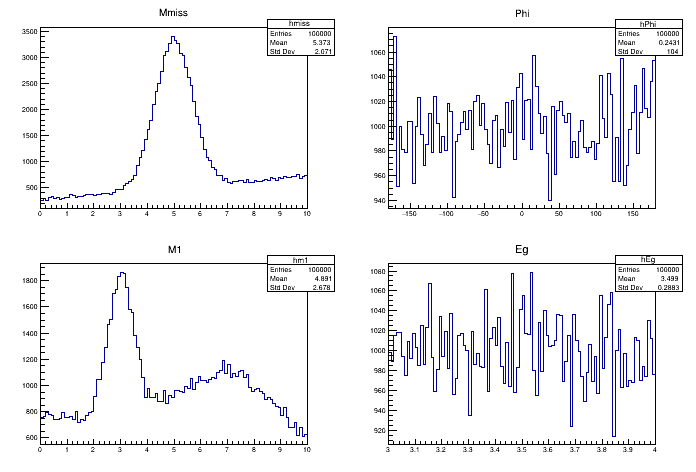

In [7]:
canvas.cd(1)
tree.Draw("Mmiss>>hmiss(100,0,10)")
canvas.cd(2)
tree.Draw("Phi>>hPhi(100,-180,180)")
canvas.cd(3)
tree.Draw("M1>>hm1(100,0,10)")
canvas.cd(4)
tree.Draw("Eg>>hEg(100,3,4)")
canvas.Draw()

In [8]:
%edit Model2.C